/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8808 - loss: 0.4174
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9679 - loss: 0.1060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9774 - loss: 0.0711
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9839 - loss: 0.0497
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0401
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8

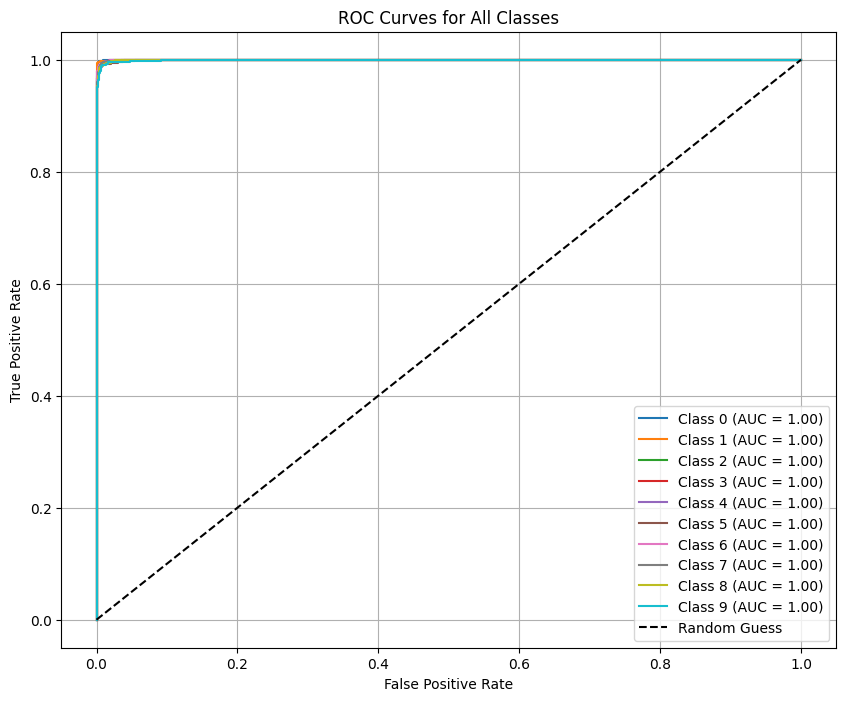

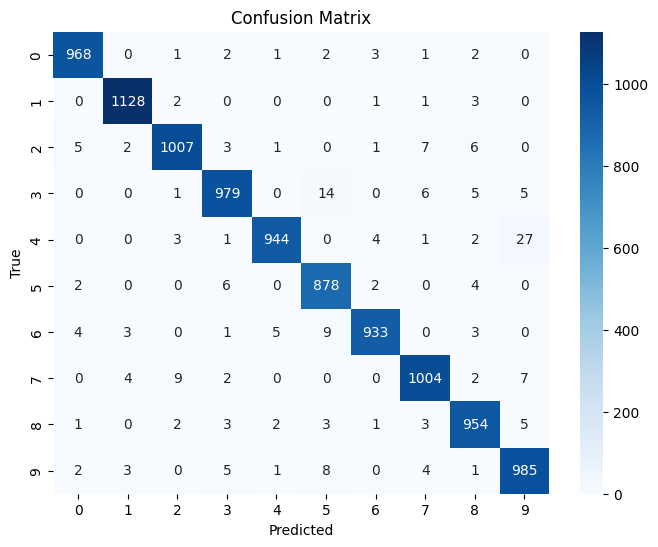

In [2]:
# Train a Deep Neural Network on the MNIST dataset using the Adam optimizer with a learning rate of 0.001, and generate a classification report and ROC AUC plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, verbose=1)

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC AUC for multi-class
roc_auc = roc_auc_score(y_test_cat, y_pred_probs, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

from sklearn.preprocessing import label_binarize

# If not already binarized:
# y_test_cat = label_binarize(y_test, classes=np.arange(10))

plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    auc_score = roc_auc_score(y_test_cat[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [3]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)


📊 How to Read the Plots
1. ROC Curves (One-vs-Rest for Each Class)
Each curve shows how well the model distinguishes one class vs. the others.

The closer a curve hugs the top-left corner, the better the model is at distinguishing that class.

The diagonal line represents random guessing (AUC = 0.5).

AUC values near 1.0 mean high discriminative power.

2. Confusion Matrix
Rows = True labels, Columns = Predicted labels.

Each cell shows how many images were labeled/predicted as that pair.

The diagonal shows correct classifications — you want strong values there.

Off-diagonal values show misclassifications, e.g., 3 misclassified as 5.

✅ Quick Summary
Optimizer: Adam (adaptive learning) helps fast convergence and performs well on MNIST.

Trainable Parameters: ~109K — manageable size for a simple digit classifier.

Performance Metrics: Classification report, ROC AUC score, confusion matrix all provide deep insight into how well each digit class is modeled.

Visuals: ROC curves and confusion matrix help validate the model’s real-world performance.